# Computer Problem Set 1.2
## Simulation of the Brownian motion

### Question 1

#### (a)
For the law of $(Z_i)_{1\le i\le2^n}$, we can simply use the proporty 

$W_t - W_s$ follows the same law of $\mathcal{N}(0, t-s)$.

Therefore, $W_{t_i^n} - W_{t_{i-1}^n}$ has the law $\mathcal{N}(0, t_i^n - t_{i-1}^n) = \mathcal{N}(0, \Delta T)$, which is equal to $\sqrt{\Delta T}\mathit{N}(0, 1)$. To show that $(Z_i)_{1\le i\le 2^n}$ is an iid family, we can use the proporty 

$W_{t_4} - W_{t_3}$ is independent of $W_{t_2} - W_{t_1}$ for all $0 \le t_1 \le t_2 \le t_3 \le t_4$.

#### (b)

In [1]:
import numpy as np
from math import sqrt
T = 1

def forward_samples(n):
    DeltaT = T / (2 ** n)
    
    # First, we take the samples Z_i * sqrt(DeltaT)
    samples = np.random.normal(size=(1000, 2 ** n + 1)) * sqrt(DeltaT)

    # Then, we have W_{t_i^n} is equal to the sum from j = 0 to j = i of Z_i * sqrt(DeltaT)
    samples[:, 0] = 0   # Initiation. The Brownian motion starts from 0.
    samples = samples.cumsum(axis=1)
    return samples

# We define n = 10 here.
n = 10
samples = forward_samples(n)

We show an example of our simulation:

Text(0, 0.5, 'Value')

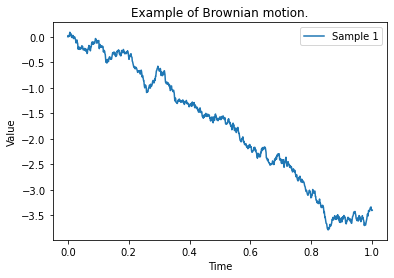

In [2]:
import matplotlib.pyplot as plt
axe_x = [T / (2 ** n) * i for i in range(2 ** n + 1)]
plt.plot(axe_x, samples[0], label="Sample 1")
plt.legend()
plt.title("Example of Brownian motion.")
plt.xlabel("Time")
plt.ylabel("Value")

#### (c)
For the sample mean and variance of $W_T$, we take the last value of every sample.

In [3]:
def mean_var(samples):
    mean_of_samples = np.mean(samples[:, -1])
    var_of_samples = np.var(samples[:, -1])
    return mean_of_samples, var_of_samples

mean_of_samples, var_of_samples = mean_var(samples)
print("Mean : {}".format(mean_of_samples))
print("Variance : {}".format(var_of_samples))

Mean : -0.04651606635391649
Variance : 0.9874589074022213


We found out that the law of $W_T$ is around $\mathcal{N}(0, 1)$, which is exactly one of the property of Brownian motion :

$W_1 - W_0$ follow the same law of $\mathcal{N}(0, 1)$.

Next, we are going to calculate the covariance of $(W_T, W_{T/2})$

In [4]:
def covariance_T_T_2(samples):
    n = samples.shape[1]
    return np.cov(samples[:, -1], samples[:, n // 2])[0][1] # We take the value wanted in the covariace matrix
covariance = covariance_T_T_2(samples)
print("Covariance between T and T/2 : {}".format(covariance))

Covariance between T and T/2 : 0.5066197108473511


The result is around 0.5, which is logical: the covariance between $W_T$ and $W_{T/2}$ is equal to $min(T, T/2) = T/2$.

The result should not change when we change the value of n.

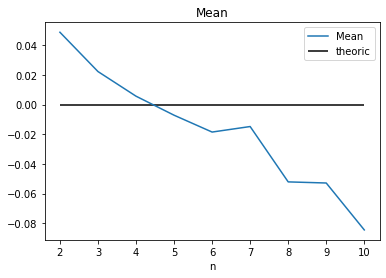

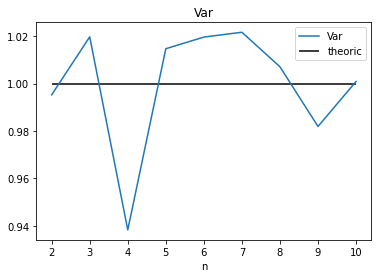

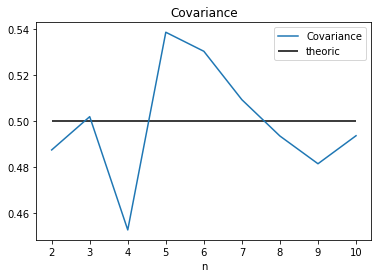

In [5]:
def analyse_graph(method, theoric_value, values, n_min=2, n_max=10):
    plt.figure()
    plt.plot([i for i in range(n_min, n_max + 1)], values, label=method)
    plt.hlines(y=theoric_value, xmin=n_min, xmax=n_max, label="theoric")
    plt.xlabel("n")
    plt.title(method)
    plt.legend()
    return

def analyse_with_n(func_to_get_samples, n_min=2, n_max=10):
    means = []
    vars_ = []
    covariances = []
    for n in range(n_min, n_max + 1):
        samples = func_to_get_samples(n)
        mean_of_samples, var_of_samples = mean_var(samples)
        covariance = covariance_T_T_2(samples)
        
        means.append(mean_of_samples)
        vars_.append(var_of_samples)
        covariances.append(covariance)
    analyse_graph("Mean", 0., means, n_min, n_max)
    analyse_graph("Var", 1., vars_, n_min, n_max)
    analyse_graph("Covariance", 0.5, covariances, n_min, n_max)
    return
analyse_with_n(forward_samples)

### Question 2

#### (a)
We use the Bayes formula : (We denote $s = \frac{s_1+s_2}{2}$)
$$
p(W_s = x|W_{s_1} = x_1, W_{s_2} = x_2) = \frac{p(W_{s_2} = x_2, W_{s_1} = x_1 | W_s = x)p(W_s = x)}{p(W_{s_1} = x_1, W_{s_2} = x_2)}
$$
where p is the density function correspond to each term.
Since $W_{s_2} - W_{s}$ is independent of $W_{s} - W_{s_1}$, so
$$p(W_{s_2} = x_2, W_{s_1} = x_1 | W_s = x) = p(W_{s_2} = x_2 | W_s = x) p(W_{s_1} = x_1 | W_s = x)$$

We also know that $W_{s_2} - W_{s_1}$ has the same law as $\mathcal{N}(0, s_2 - s_1)$, we have
$$
p(W_{s_1} = x_1, W_{s_2} = x_2) = p(W_{s_2} = x_2 | W_{s_1} = x_1)p(W_{s_1} = x_1)
$$


Finally, we know the following density :

$$
p(W_{s_2} = x_2 | W_s = x) = \frac{1}{\sqrt{\pi(s_2 - s_1)}}e^{-\frac{(x_2 - x)^2}{s_2 - s_1}}
$$

$$
p(W_{s_1} = x_1 | W_s = x) = \frac{1}{\sqrt{\pi s_1\frac{s_2 - s_1}{s}}}e^{-\frac{(x_1 - \frac{s_1}{s}x)^2}{s_1\frac{s_2 - s_1}{s}}}
$$

$$
p(W_s = x) = \frac{1}{\sqrt{2\pi s}}e^{-\frac{x^2}{2s}}
$$

$$
p(W_{s_2} = x_2 | W_{s_1} = x_1) = \frac{1}{\sqrt{2\pi (s_2 - s_1)}}e^{-\frac{(x_2 - x_1)^2}{2(s_2 - s_1)}}
$$

$$
p(W_{s_1} = x_1) = \frac{1}{\sqrt{2\pi s_1}}e^{-\frac{x_1^2}{2s_1}}
$$

Finally, after some calculation, we have

$$
p(W_s = x|W_{s_1} = x_1, W_{s_2} = x_2) = \frac{1}{\sqrt{\pi \frac{s_2 - s_1}{2}}}e^{-\frac{2\bar{x}^2}{s_2 - s_1}}
$$

so $W_s = x|W_{s_1} = x_1, W_{s_2} = x_2$ has the same law as $\mathcal{N}(\bar{x}, \frac{s_2 - s_1}{4})$

#### (b)
It's the strong Markov property of Brownian motion:

For $u < s_1$, $W_{\bar s}|W_{s_1}, W_u$ has the same law as $W_{\bar s}|W_{s_1}$ because the value of $W_{\bar s}$ depends only on $W_{s_1}$.

For $u > s_2$, $W_{\bar s}|W_{s_2}, W_u$ has the same law as $W_{\bar s}|W_{s_2}$.

Therefore, knowing the values of $W_{s_1}$ and $W_{s_2}$, we have 

$$
W_{\bar s}|\left( W_{s_1} = x_1, W_{s_2} = x_2, (W_u)_{u\not\in[s_1, s_2]}\right) = 
W_{\bar s}|\left( W_{s_1} = x_1, W_{s_2} = x_2\right)
$$
and thus has the same law as $\mathcal N(\bar{x}, \frac{s_2-s_1}{4})$

#### (c)

In [6]:
def backward_samples(n):
    # The length of one sample
    length = 2 ** n + 1
    
    # We change the scale here. We can thus simply use the integers for the calculation with index.
    samples = np.zeros((1000, length))
    
    samples[:, -1] = np.random.normal(size=1000) # W_1 have the law N(0, 1)
    # Initiation of diff between index with exponant of 2
    m = n - 1
    while m >= 0:
        # The difference in time in this round.
        diff = 2 ** m
        
        # The variance is equal to (s_2 - s_1) / 4, where s_2 - s_1 = 2 * diff / 2^n this round
        deviation = np.sqrt(diff / 2**(n + 1))
        
        # The t_left is equal to 0, 2 * diff, 4 * diff ... in index
        # The t_right is equal to 2 * diff, 4 * diff ... in index
        x_bar = (samples[:, 0:length - 1:2*diff] + samples[:, 2*diff:length:2*diff]) / 2

        # What we want to calculate is the indice between these times :
        # diff, 3 * diff, ... in index
        samples[:, diff:length:2*diff] = np.random.normal(loc=x_bar, scale=deviation)

        m -= 1
    return samples

#### (d)

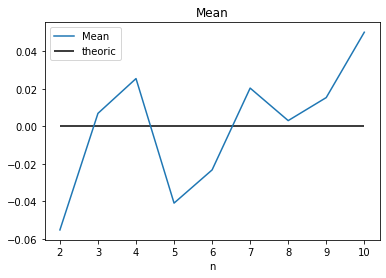

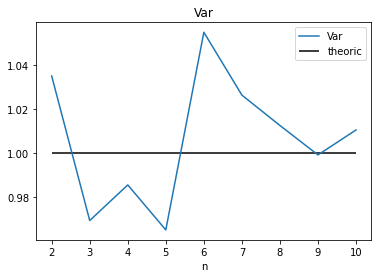

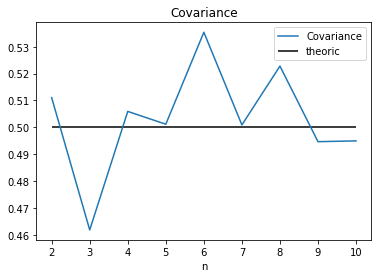

In [7]:
analyse_with_n(backward_samples)

We have always the same result for this method and the method in question 1.

### Question 3

In [8]:
def quadratic_variation(func_to_get_samples, n):
    samples = func_to_get_samples(n)
    # QV^n(W)_T with 1000 samples
    QV_n = np.sum((samples[:, 1:] - samples[:, :-1]) ** 2, axis=1)
    return np.mean(QV_n) # Estimation

n_start = 10
n_end = 21

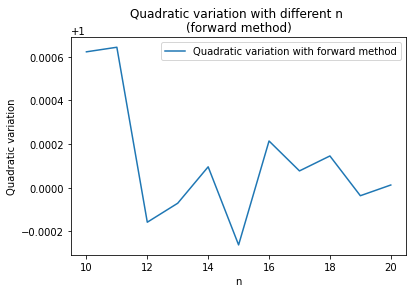

In [9]:
forward_quads = [quadratic_variation(forward_samples, i) for i in range(n_start, n_end)]
plt.plot([i for i in range(n_start, n_end)], forward_quads, label="Quadratic variation with forward method")
plt.xlabel("n")
plt.ylabel("Quadratic variation")
plt.title("Quadratic variation with different n \n(forward method)")
plt.legend()
plt.show()

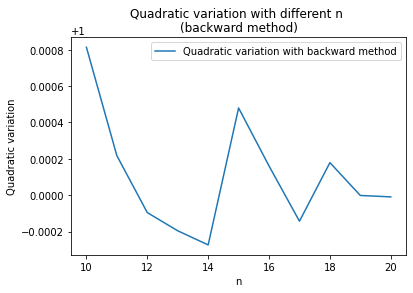

In [10]:
backward_quads = [quadratic_variation(backward_samples, i) for i in range(10, 21)]
plt.plot([i for i in range(10, 21)], backward_quads, label="Quadratic variation with backward method")
plt.xlabel("n")
plt.ylabel("Quadratic variation")
plt.title("Quadratic variation with different n \n(backward method)")
plt.legend()
plt.show()

The value of the quadratic variation should tends toward 1, which is proved by the theory. The y-axis has changed it's scale to y - 1 (with +1 at the left top of the graph).